In [1]:
using DataFrames, Distributions, Extremes, Gadfly

┌ Info: Loading DataFrames support into Gadfly.jl
└ @ Gadfly /Users/jalbert/.julia/packages/Gadfly/09PWZ/src/mapping.jl:228


In [2]:
# Génération des données

m = 50  # nb de membres
ξ = rand(Normal(.1,.05),m) 
pd = GeneralizedExtremeValue.(0,1,ξ) # on suppose la localisation et l'échelle connues
Y = rand.(pd,150);

In [3]:
# Initialisation pour MCMC

N = 3000
ξ = zeros(N,m)
ν = zeros(N)
τ² = ones(N)

3000-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮  
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [4]:
for i=2:N
   
    ξ̃ = ξ[i-1,:] + randn(m)/20
    
    lr = loglikelihood.(GeneralizedExtremeValue.(0,1,ξ̃),Y) - 
         loglikelihood.(GeneralizedExtremeValue.(0,1,ξ[i-1,:]),Y) +
         logpdf.(Normal(ν[i-1],sqrt(τ²[i-1])), ξ̃) -
         logpdf.(Normal(ν[i-1],sqrt(τ²[i-1])), ξ[i-1,:])
    
    ξ[i,:] = ξ[i-1,:]
    
    ind = lr .> log.(rand(m))
    ξ[i,ind] = ξ̃[ind]
    
    
    ξ̄ = mean(ξ[i,:])
    ν[i] = rand(Normal(ξ̄,sqrt(τ²[i-1])))
    
    s² = sum( (ξ[i,j] - ξ̄)^2 for j=1:m )
    
    τ²[i] = rand(InverseGamma(m/2, s²/2))
    
end

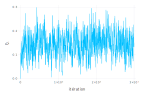

In [5]:
plot(x=1:N, y=ξ[:,1], Geom.line, Guide.xlabel("itération"), Guide.ylabel("ξ₁"))

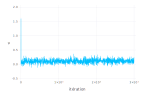

In [6]:
plot(x=1:N, y=ν, Geom.line, Guide.xlabel("itération"), Guide.ylabel("ν"))